<a href="https://colab.research.google.com/github/Kiran-Panhalkar/EDA---Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

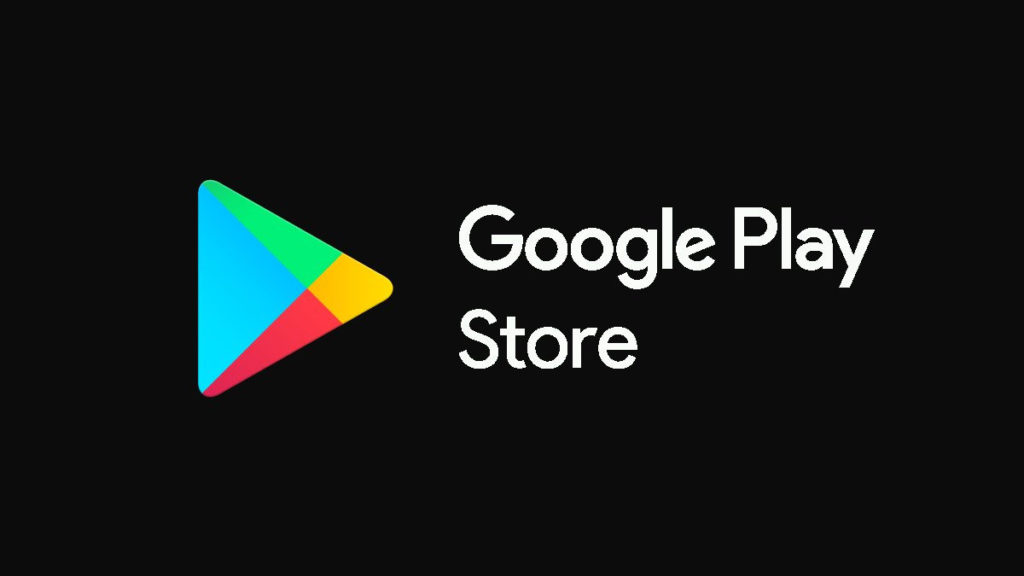

In [1]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization 
import plotly.express as px       # for data visualization
from sklearn.impute import SimpleImputer

### Read the dataset into dataframe
### **Play Store Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading dataset
GPStore = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Exploratory Data Analysis/Play Store Data.csv')

In [5]:
# displaying the head or the first 10 rows of the dataframe
GPStore.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
# display the shape of the dtaframe (The No. of rows and columns)
GPStore.shape

(10841, 13)

In [7]:
# prints a summary of the dataframe rows and columns, including information on the datatypes and non-null values
GPStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Preprocessing and Cleaning

### Explore all columns one by one and check for invalid data and clean data accordingly.

#### App Column:
###### Their is always a chance that duplicates may present in the data. so, check for duplicate values in App column if any then drop those rows.

In [8]:
# get the count/frequency of all unique values of app column
GPStore['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
                                                    ..
Yahoo Weather                                        1
Metro name iD                                        1
Ek Kauwa Pyasa Tha                                   1
GO Notifier                                          1
DAILY: Free Classifieds App for Android              1
Name: App, Length: 9660, dtype: int64

In [9]:
# shape of dataframe
print(GPStore.shape)

# remove the duplicate values in the dataframe.
GPStore = GPStore.drop_duplicates(subset=['App'], keep='first')

# shape of dataframe after removing duplicates
print(GPStore.shape)

(10841, 13)
(9660, 13)


So, we have removed 1181 duplicates rows which would have caused incorrect analysis.

### Category Column:
##### Check for unique categories. 

In [10]:
# get all the unique values in category column
GPStore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<b> In the 'Category' column we have one value as '1.9' which seems to be invalid. Let's have a look at that data entry. 

In [11]:
# get the row which has category = 1.9
GPStore[GPStore.Category == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
# remove the row with the specified index; axis 0 implies along the rows
GPStore = GPStore.drop([10472], axis=0)

In [13]:
# display the shape of the dataframe
GPStore.shape

(9659, 13)

### Rating Column:
###### Check for valid rating values

In [14]:
# check the statistical summary
GPStore['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<b> All the rating values are within the range so no invalid data is present in 'Rating' Column. But the count of rating values is 8196 where as we have 9659 entries in our dataset. It shows that there are missing values in 'Rating Column. Lets check for the Missing Values.

In [15]:
# find the total no. of missing values present 
GPStore.Rating.isnull().sum()

1463

We can see that 1463 missing values present in `Rating` column. Imputing the rating by mean/median/mode of rating may not necessarily be an appropriate strategy, as in real life ratings are given by the customers. So, we are using linear interpolation to fill missing values inside `Rating` column.

In [16]:
# Missing Value Handling using interpolate forward linear method.
GPStore.interpolate(method='linear',limit_direction='forward',inplace=True)

In [17]:
GPStore.isnull().sum()   # rechecking the null values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [18]:
# display the shape of the dataframe
GPStore.shape

(9659, 13)

### Review Column:
###### Check for any non numeric values if any replace it and convert it to a numeric column

In [19]:
# displays frequency measures
GPStore.Reviews.describe() 

count     9659
unique    5330
top          0
freq       593
Name: Reviews, dtype: object

In [20]:
# The datatype for the reviews column is string
# check for any non-numeric values
GPStore.Reviews.str.isnumeric().sum()

9659

In [21]:
# convert the Review column to numeric
GPStore.Reviews = pd.to_numeric(GPStore.Reviews)

In [22]:
# statistical summary of Review column
GPStore.Reviews.describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### Size Column:
#####  In the 'Size' column we have the values as '20M' and '10K' which represents the size of app in MB and KB respectively. So replace 'M' and 'K' with their equivalent numeric values in bytes.

In [23]:
# get the count/frequency of all the unique values
GPStore.Size.value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
467k                     1
89k                      1
713k                     1
516k                     1
860k                     1
Name: Size, Length: 461, dtype: int64

In [24]:
# replace all the "Varies with device" with 0
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in x else x)

# replace all the 'k' representing thousand
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('k', '') if 'k' in x else x)

# replace all the 'M' representing Million with M*1024
GPStore.Size = GPStore.Size.apply(lambda x: float(x.replace('M', ''))*1024 if 'M' in x else x)

In [25]:
# convert to float datatype
GPStore.Size = GPStore.Size.apply(lambda x: float(x))

In [26]:
# statistical summary
GPStore.Size.describe()

count      9659.000000
mean      18231.394834
std       22011.410257
min           0.000000
25%        2969.600000
50%        9318.400000
75%       25600.000000
max      102400.000000
Name: Size, dtype: float64

In [27]:
# rename the size column to Size_in_KB
GPStore = GPStore.rename(columns={'Size':'Size_in_KB'})

In [28]:
GPStore.head()

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Installs column:
###### The Installs column shows the number of installations for an app. The values consists of '+' and ',' characters. So remove '+' and ',' present in Installs column and convert it to numeric. 

In [29]:
GPStore.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9659, dtype: object

In [30]:
# values are given as, for example, '1,000+'. Removes the '+' sign from the end of the string
GPStore.Installs=GPStore.Installs.apply(lambda x: x.strip('+'))

# numbers have commas in them, for eg., 100,000. Removes all the commas from the strings.
GPStore.Installs=GPStore.Installs.apply(lambda x: x.replace(',',''))

# get the count/frequency of all the unique values of the specified column
GPStore.Installs.value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [31]:
# convert to numeric datatype
GPStore.Installs=pd.to_numeric(GPStore.Installs)

In [32]:
GPStore.Installs.describe()

count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### Check the values in Type column 
##### The type of the app is categorized as "Free" or "Paid" and we have these values only. So no cleaning is required for this column.

In [33]:
# get the frequency/count of all the unique values
GPStore.Type.value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [34]:
# find the total no. of missing values present 
GPStore.Type.isnull().sum()

1

In [35]:
# filling with most common class

impute_size = SimpleImputer(strategy="most_frequent") 
GPStore['Type']=impute_size.fit_transform(GPStore[['Type']])

In [36]:
GPStore["Type"].describe()  # get the summary

count     9659
unique       2
top       Free
freq      8903
Name: Type, dtype: object

### Price Column
#####  The data for the paid apps is prefix with "\\$" character. Remove "$" before the price and convert it to numeric

In [37]:
# check for the '$' symbol 
GPStore.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [38]:
# remove the dollar sign from the string
GPStore.Price = GPStore.Price.apply(lambda x: x.strip('$'))

In [39]:
# converting to numeric 
GPStore.Price = pd.to_numeric(GPStore.Price)

In [40]:
# stastical summary of price column
GPStore.Price.describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### Content Rating column

In [41]:
# # get all the unique values present in the specified column
GPStore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### Genres

In [42]:
# get all the unique values present
GPStore.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

### Last Updated column
#### Check for the data and convert it into date format

In [43]:
GPStore['Last Updated']        # here we have string as a data type so convert it into datetime

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 9659, dtype: object

In [44]:
GPStore['Last Updated'] = pd.to_datetime(GPStore['Last Updated'])

In [45]:
# display the head or top 5 columns of the dataframe
GPStore['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

### Current Ver Column
##### Check for the nan values

In [46]:
# count the no. of null values in the dataframe
GPStore['Current Ver'].isnull().sum()

8

In [47]:
# get the count/frequency of all the unique values
GPStore['Current Ver'].value_counts()

Varies with device    1055
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
1.375                    1
12.2.7.3671              1
Cow V3.11                1
5.0.45                   1
6.4.6                    1
Name: Current Ver, Length: 2817, dtype: int64

In [48]:
GPStore['Current Ver'].describe()

count                   9651
unique                  2817
top       Varies with device
freq                    1055
Name: Current Ver, dtype: object

In [49]:
# fill the missing values with most commom class or Mode

impute_size = SimpleImputer(strategy="most_frequent") 
GPStore['Current Ver']=impute_size.fit_transform(GPStore[['Current Ver']])

In [50]:
GPStore['Current Ver'].describe()  

count                   9659
unique                  2817
top       Varies with device
freq                    1063
Name: Current Ver, dtype: object

### Android Ver

In [51]:
# get the all unique values 
GPStore['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [52]:
# count the no. of null values in the dataframe
GPStore['Android Ver'].isnull().sum()

2

In [53]:
GPStore['Android Ver'].describe()

count           9657
unique            33
top       4.1 and up
freq            2202
Name: Android Ver, dtype: object

In [54]:
# fill the missing values with most commom class or Mode

impute_size = SimpleImputer(strategy="most_frequent") 
GPStore['Android Ver']=impute_size.fit_transform(GPStore[['Android Ver']])

In [55]:
GPStore.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size_in_KB        0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Thus we have successfully filled all the missing values with appropriate methods.

In `Genre` column we can see that most of the apps have two genre. so, create new column `Sub-Genres`

In [56]:
# in case an app belongs to 2 genres, the values are separated by ';'. Split the values with ; as a separator
Genre_split = GPStore.Genres.str.split(';',expand=True)

# add column names
Genre_split.columns = ['Genres', 'Sub-Genres']

# display the head or top 5 columns of the dataframe
Genre_split.head()

,Genres,Sub-Genres
0,Art & Design,None
1,Art & Design,Pretend Play
2,Art & Design,None
3,Art & Design,None
4,Art & Design,Creativity


In [57]:
# remove the Genres column from the dataframe
GPStore.drop('Genres', axis=1, inplace=True)

In [58]:
# merge the two dataframes
GPStore = GPStore.merge(Genre_split, left_index=True, right_index=True)

In [59]:
GPStore.head()

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres,Sub-Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity


In [60]:
GPStore.shape

(9659, 14)

In [61]:
GPStore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size_in_KB      9659 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Last Updated    9659 non-null   datetime64[ns]
 10  Current Ver     9659 non-null   object        
 11  Android Ver     9659 non-null   object        
 12  Genres          9659 non-null   object        
 13  Sub-Genres      393 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
m

Now the Dtype is looking good. Thus we have successfully **Cleaned and Prepared the Data** for analysis. 

We can also save the cleaned Playstore DF as .csv so, as to eliminate preprocessing and cleaning of data and use those cleaned DF whenever we required.

In [62]:
# save the cleaned dataframe as csv
GPStore.to_csv('GPStoreClean.csv',index=False)

### Exploratory Data Analysis and Visualization

In [63]:
# Read the cleaned file.
cleaned_gpstore = pd.read_csv('GPStoreClean.csv')

 Heatmap Description:
 
**Dark color** represents a **positive correlation**,

**Light color/ white** is a towards the **negative correlation**.

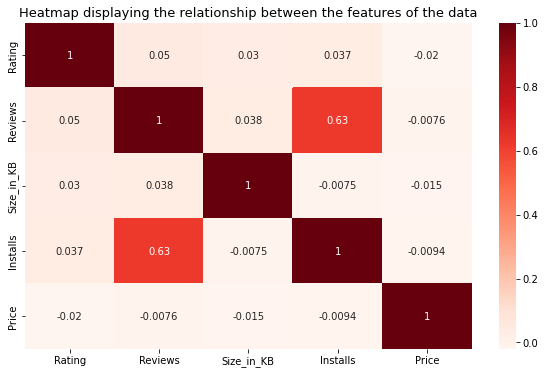

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(cleaned_gpstore.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

There is a **strong positive correlation** between the `Reviews` and `Installs`.


#### 1. Distribution of Apps in terms of Categories

In [65]:
category_quantity=cleaned_gpstore.groupby(cleaned_gpstore.Category).count()
category_quantity.reset_index(inplace=True)

lets, plot the above table using horizontal bar plot

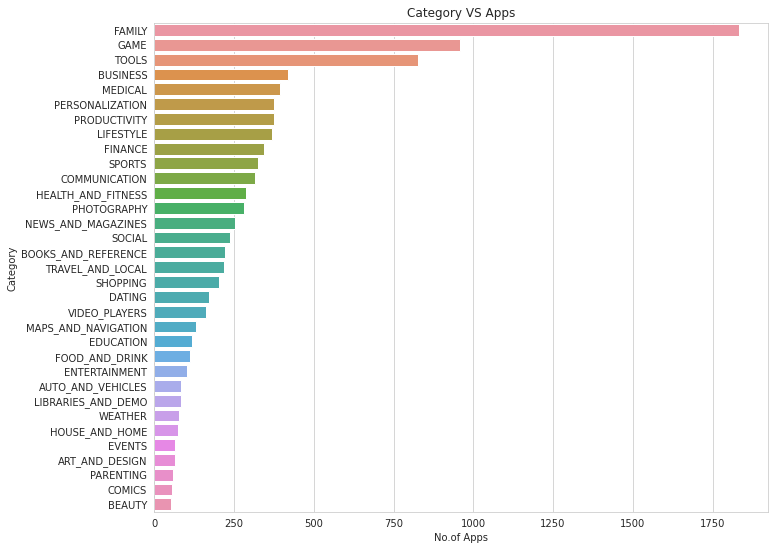

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,9))
category_quantity_view = sns.barplot(x="App",y="Category",data=category_quantity,
                                     order=category_quantity.sort_values('App',ascending = False).Category)
category_quantity_view.set(xlabel='No.of Apps',title="Category VS Apps")
plt.show();

Family, Game and Tools are the top 3 categories which has more number of apps

#### 2. Number of Installs in terms of categories

In [67]:
# lets create a dataframe which stores the sum of number of installs in each category
category_installs = cleaned_gpstore.groupby(cleaned_gpstore.Category).sum()
category_installs.reset_index(inplace=True)

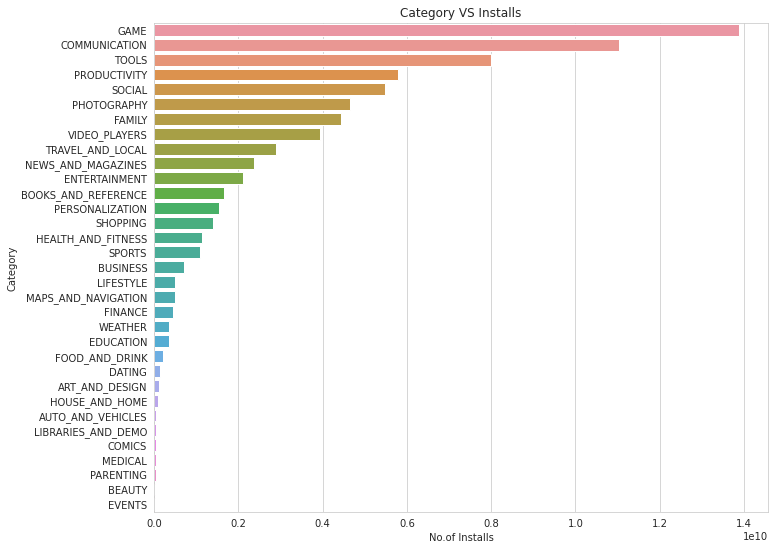

In [68]:
# lets plot the above dataframe using barplot
sns.set_style("whitegrid")
plt.figure(figsize=(11,9))
category_installs_view = sns.barplot(x="Installs",y="Category",data=category_installs,
                                     order=category_installs.sort_values('Installs',ascending = False).Category)
category_installs_view.set(xlabel='No.of Installs',title="Category VS Installs")
plt.show();

Game, Communication and Tools are the top 3 categories which has more number of app Installs

#### 3. Free App Vs Paid App

In [69]:
# create a dataframe by the type of the app
type_df=cleaned_gpstore.groupby("Type").count()

In [70]:
# Here we have two categories in Type column so pie chart gives the better visualization in terms of percentage.
px.pie(type_df, names=type_df.index,values='App')

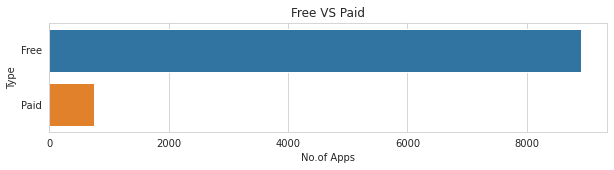

In [71]:
type_df.reset_index(inplace=True)
plt.figure(figsize=(10,2))
type_view=sns.barplot(x="App",y="Type",data=type_df)
type_view.set(xlabel="No.of Apps",title="Free VS Paid");

The numbers of free apps are more than paid apps 

#### 4. Content Rating

In [72]:
content_df = cleaned_gpstore.groupby('Content Rating').count()

In [73]:
labels = ['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Unrated']

In [74]:
colors = ['red','darkorchid','cornflowerblue', 'limegreen', 'orange', 'lightcoral']

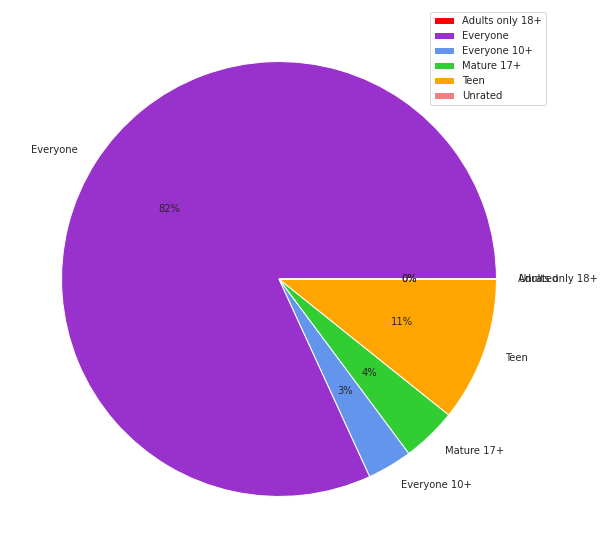

In [75]:
#create pie chart
plt.figure(figsize=(10,10))
plt.pie(content_df['App'], labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(labels, loc="best")
plt.show()

82% apps are falls under everyone categoty

#### 5. Top 10 Highest Downloaded Apps

In [76]:
cleaned_gpstore.App[cleaned_gpstore.Installs==cleaned_gpstore.Installs.max()].to_list()

['Google Play Books',
 'Messenger – Text and Video Chat for Free',
 'WhatsApp Messenger',
 'Google Chrome: Fast & Secure',
 'Gmail',
 'Hangouts',
 'Skype - free IM & video calls',
 'Google Play Games',
 'Subway Surfers',
 'Facebook',
 'Instagram',
 'Google+',
 'Google Photos',
 'Maps - Navigate & Explore',
 'Google Street View',
 'Google',
 'Google Drive',
 'YouTube',
 'Google Play Movies & TV',
 'Google News']

These are the Highest Downloaded Apps in the Playstore.

#### 6. Top reviewed Apps

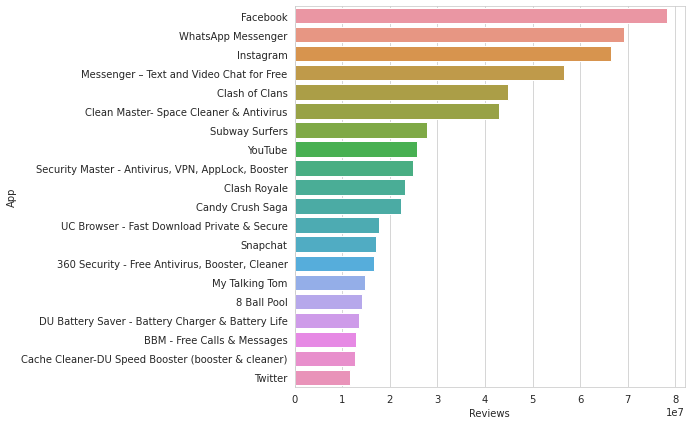

In [77]:
top_review_app=cleaned_gpstore.sort_values("Reviews",ascending=False,ignore_index=True).head(20)
plt.figure(figsize=(7,7))
sns.barplot(x="Reviews",y="App",data=top_review_app);

Social media apps Facebook, WhatsApp Messenger, Instagram are the top 3 reviewed apps.

#### 7. Most Popular Apps

We used two metrics - Rating and Installs to define most popular Apps as Rating X No.of Installs and the one with highest value is considered to be the most popular.

In [78]:
app_quality_df=pd.DataFrame()
app_quality_df["App"]=cleaned_gpstore.App
app_quality_df["Quality"]=cleaned_gpstore.Rating*cleaned_gpstore.Installs
app_quality_df

,App,Quality
0,Photo Editor & Candy Camera & Grid & ScrapBook,41000.0
1,Coloring book moana,1950000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",23500000.0
3,Sketch - Draw & Paint,225000000.0
4,Pixel Draw - Number Art Coloring Book,430000.0
...,...,...
9654,Sya9a Maroc - FR,22500.0
9655,Fr. Mike Schmitz Audio Teachings,500.0
9656,Parkinson Exercices FR,4750.0
9657,The SCP Foundation DB fr nn5n,4500.0


We can use this df to find most popular apps

In [79]:
popular_app_df=cleaned_gpstore.loc[app_quality_df.sort_values("Quality",ascending=False).head(10).index].reset_index(drop=True)
popular_app_df

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres,Sub-Genres
0,Instagram,SOCIAL,4.5,66577313,0.0,1000000000,Free,0.0,Teen,2018-07-31,Varies with device,Varies with device,Social,NaN
1,Subway Surfers,GAME,4.5,27722264,77824.0,1000000000,Free,0.0,Everyone 10+,2018-07-12,1.90.0,4.1 and up,Arcade,NaN
2,Google Photos,PHOTOGRAPHY,4.5,10858556,0.0,1000000000,Free,0.0,Everyone,2018-08-06,Varies with device,Varies with device,Photography,NaN
3,Google Drive,PRODUCTIVITY,4.4,2731171,0.0,1000000000,Free,0.0,Everyone,2018-08-06,Varies with device,Varies with device,Productivity,NaN
4,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device,Communication,NaN
5,Google,TOOLS,4.4,8033493,0.0,1000000000,Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device,Tools,NaN
6,Gmail,COMMUNICATION,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,2018-08-02,Varies with device,Varies with device,Communication,NaN
7,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,2018-08-01,Varies with device,Varies with device,Communication,NaN
8,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,0.0,1000000000,Free,0.0,Everyone,2018-07-31,Varies with device,Varies with device,Travel & Local,NaN
9,YouTube,VIDEO_PLAYERS,4.3,25655305,0.0,1000000000,Free,0.0,Teen,2018-08-02,Varies with device,Varies with device,Video Players & Editors,NaN


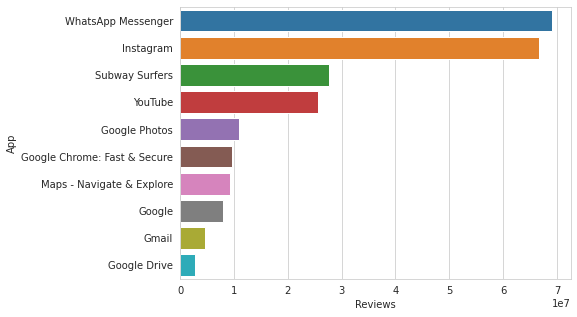

In [80]:
plt.figure(figsize=(7,5))
sns.barplot(x="Reviews",y="App",data=popular_app_df,
            order=popular_app_df.sort_values('Reviews',ascending = False).App);

In above barplot we can see that Instagram and Whatsapp has relatively high reviews (Frequent User) while on the other hand Google Drive and Gmail despite having the comparatively low reviews, they are much useful to the user.

#### 8. App's which Earned most through selling

Here we only consider paid apps and create a new Dataframe `app_earned_df` Dataframe that contains `App`, `Installs` and `Price`. A new column is defined called `Earned`, that is calculated by multiplying `Installs` with `Price`.

In [81]:
# create the dataframe which has only paid apps and add the "Earned" column.
app_earned_df=pd.DataFrame()
app_earned_df=cleaned_gpstore[cleaned_gpstore.Type=="Paid"][["App","Category","Installs","Rating","Price"]].copy()
app_earned_df.reset_index(inplace=True,drop=True)
app_earned_df["Earned"]=app_earned_df.Installs*app_earned_df.Price
app_earned_df

,App,Category,Installs,Rating,Price,Earned
0,TurboScan: scan documents and receipts in PDF,BUSINESS,100000,4.70,4.99,499000.0
1,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,100000,4.80,4.99,499000.0
2,Puffin Browser Pro,COMMUNICATION,100000,4.00,3.99,399000.0
3,"Moco+ - Chat, Meet People",DATING,10000,4.20,3.99,39900.0
4,Calculator,DATING,1000,2.60,6.99,6990.0
...,...,...,...,...,...,...
751,FP VoiceBot,FAMILY,100,3.75,0.99,99.0
752,Fast Tract Diet,HEALTH_AND_FITNESS,1000,4.40,7.99,7990.0
753,Trine 2: Complete Story,GAME,10000,3.80,16.99,169900.0
754,"sugar, sugar",FAMILY,10000,4.20,1.20,12000.0


In [82]:
# sort the apps based on earned value
app_earned_df.sort_values(["Earned","Rating"], ascending=False).reset_index(drop=True).head(10)

,App,Category,Installs,Rating,Price,Earned
0,Minecraft,FAMILY,10000000,4.5,6.99,69900000.0
1,I am rich,LIFESTYLE,100000,3.8,399.99,39999000.0
2,I Am Rich Premium,FINANCE,50000,4.1,399.99,19999500.0
3,Hitman Sniper,GAME,10000000,4.6,0.99,9900000.0
4,Grand Theft Auto: San Andreas,GAME,1000000,4.4,6.99,6990000.0
5,Sleep as Android Unlock,LIFESTYLE,1000000,4.5,5.99,5990000.0
6,Facetune - For Free,PHOTOGRAPHY,1000000,4.4,5.99,5990000.0
7,DraStic DS Emulator,GAME,1000000,4.6,4.99,4990000.0
8,I'm Rich - Trump Edition,LIFESTYLE,10000,3.6,400.00,4000000.0
9,I am Rich Plus,FAMILY,10000,4.0,399.99,3999900.0


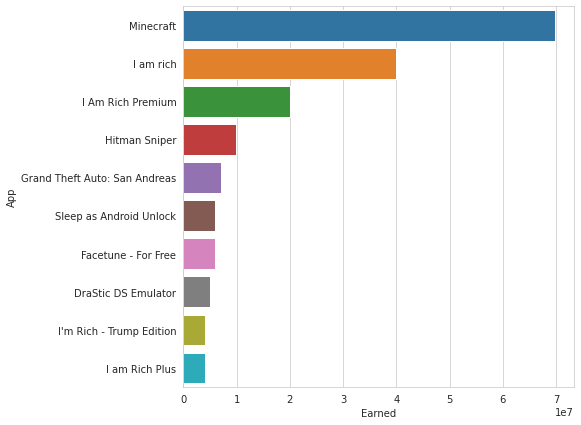

In [83]:
# display the top earning apps using barplot
top_earned_apps=app_earned_df.sort_values(["Earned","Rating"], ascending=False).reset_index(drop=True).head(10)
plt.figure(figsize=(7,7))
sns.barplot(x="Earned",y="App",data=top_earned_apps);

These are the top 10 Apps that has earned most through selling.
also, we can see that **Minecraft, I am rich** and **I am rich premium** are the top paid apps.

#### 9. Top Sub-Genres by number of installs

In [84]:
# create the dataframe of popular sub-genres of the app
sub_genres_count = cleaned_gpstore.groupby('Sub-Genres')['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False)

In [85]:
# setting the column name
sub_genres_count.set_axis(['Sub-Genres','Number_of_installs'],axis=1,inplace=True)

In [86]:
# It's time to see top sub-genres with most installs
px.bar(data_frame = sub_genres_count, x='Sub-Genres', y='Number_of_installs',
       text='Number_of_installs',
       color='Sub-Genres',
       title='Top Sub-Genres by number of installs')

We can see that Action & Adventure is top Sub-Genres by number of installs.

In [114]:
# remove the sub-genres column
cleaned_gpstore.drop('Sub-Genres',axis=1,inplace=True)

### **User Reviews Data**

In [117]:
# Read the dataset
user_reviews = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Exploratory Data Analysis/User Reviews.csv')

In [118]:
# display the top five rows of the dataset
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [119]:
# check the size of dataset
user_reviews.shape

(64295, 5)

Merging dataframes on apps

In [121]:
merged_df = cleaned_gpstore.merge(user_reviews, on="App")

In [126]:
merged_df.head(2)

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,It bad >:(,Negative,-0.725,0.833333


In [123]:
merged_df.shape

(61556, 17)

In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. 
* Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. 
* Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
* Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

In [124]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61556 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     61556 non-null  object 
 1   Category                61556 non-null  object 
 2   Rating                  61556 non-null  float64
 3   Reviews                 61556 non-null  int64  
 4   Size_in_KB              61556 non-null  float64
 5   Installs                61556 non-null  int64  
 6   Type                    61556 non-null  object 
 7   Price                   61556 non-null  float64
 8   Content Rating          61556 non-null  object 
 9   Last Updated            61556 non-null  object 
 10  Current Ver             61556 non-null  object 
 11  Android Ver             61556 non-null  object 
 12  Genres                  61556 non-null  object 
 13  Translated_Review       35929 non-null  object 
 14  Sentiment               35934 non-null

In [127]:
merged_df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size_in_KB                    0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Genres                        0
Translated_Review         25627
Sentiment                 25622
Sentiment_Polarity        25622
Sentiment_Subjectivity    25622
dtype: int64

In [128]:
# remove all the rows having null values
merged_df.dropna(inplace=True)

In [129]:
merged_df.shape

(35929, 17)

### Percentage of Review Sentiments

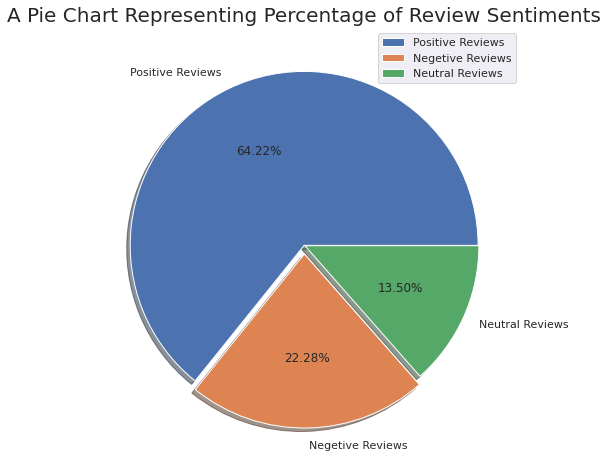

In [143]:
# let's plot a pie chart representing percentage of review sentiments
sentiment_counts = list(merged_df['Sentiment'].value_counts())
labels = ['Positive Reviews', 'Negetive Reviews','Neutral Reviews']
plt.figure(figsize=(10,8))
plt.pie(sentiment_counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

We can see that Positives Reviews (64.22%) are much higher than Negative Reviews (22.28%) and Neutral Reviews (13.50%).

### Histogram of subjectivity

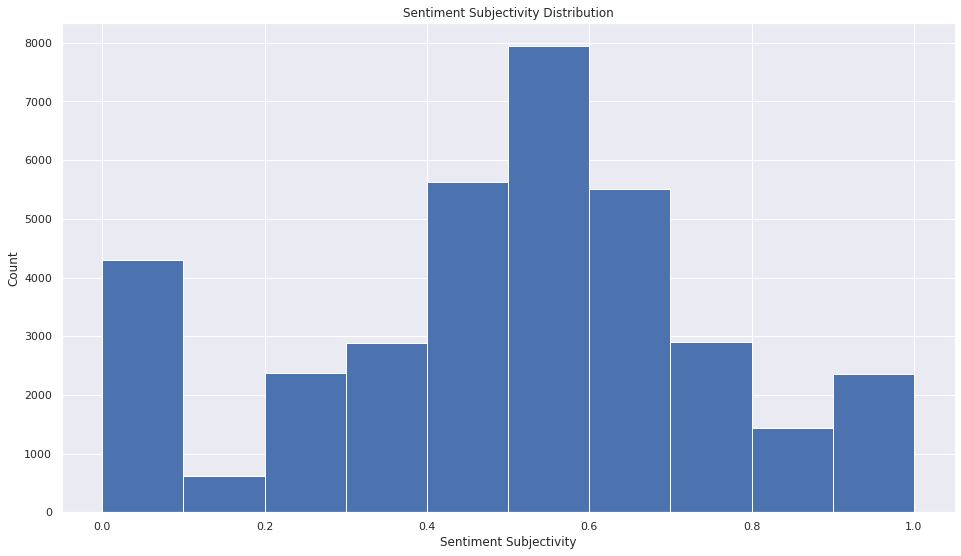

In [137]:
# Plotting the histogram representing the sentiment subjectivity distribution
plt.figure(figsize=(16,9))
plt.hist(merged_df['Sentiment_Subjectivity'])
plt.xlabel("Sentiment Subjectivity")
plt.ylabel("Count")
plt.title("Sentiment Subjectivity Distribution")
plt.show()

We can see that the maximum number of sentiment subjectivity lies between 0.4 to 0.7. 

From this, we can conclude that most of the users give reviews to the applications according to their experience.

### Histogram of polarity

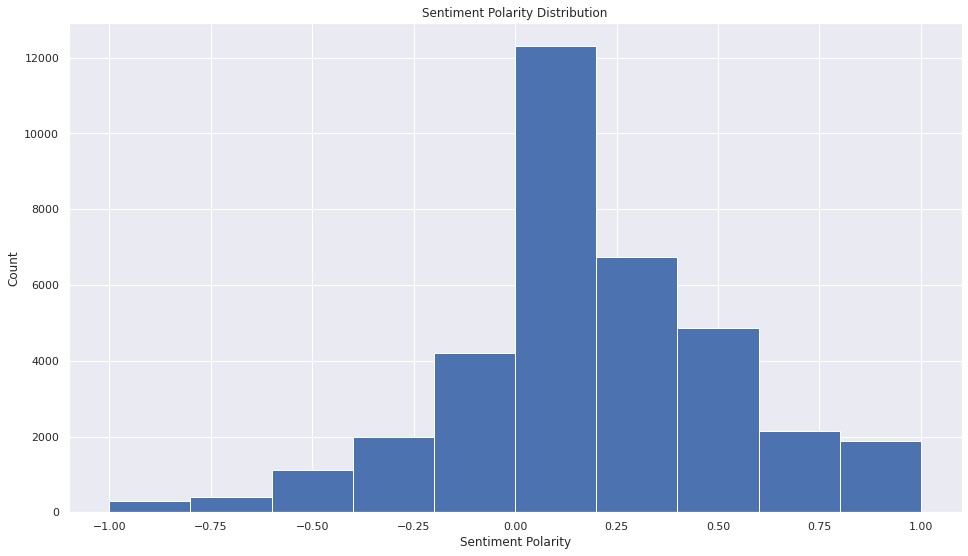

In [138]:
# Plotting the histogram representing the sentiment polarity distribution
plt.figure(figsize=(16,9))
plt.hist(merged_df['Sentiment_Polarity'])
plt.xlabel("Sentiment Polarity")
plt.ylabel("Count")
plt.title("Sentiment Polarity Distribution")
plt.show()

Here we can see that the maximum number of sentiment polarity lies between 0 to 1. 

From this, we can conclude that reviews given by the users are mostly positive.

### Distribution of type of reviews, Categoty wise

In [130]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [131]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



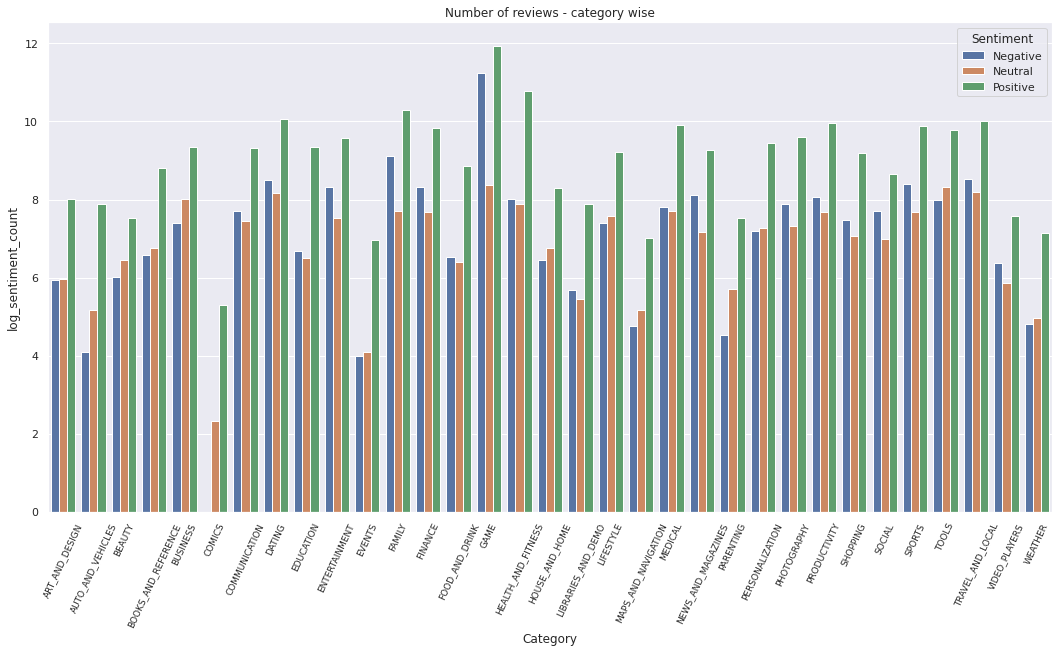

In [146]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("log_sentiment_count")
plt.title("Number of reviews - category wise")
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

* we can see from the above plot that the numbers of positive reviews are much higher in each categoty than negetive and neutral ones. 
* but the neutral reviews are also more which can be towards positive side or negative side. These mixed types of reviews play an important role for readers to understand the overall feedback of the users.

### Word cloud on translated reviews

In [156]:
# create a dataframe which stores the notnull translates rewiews
review_notnull = user_reviews[user_reviews['Translated_Review'].notnull()]

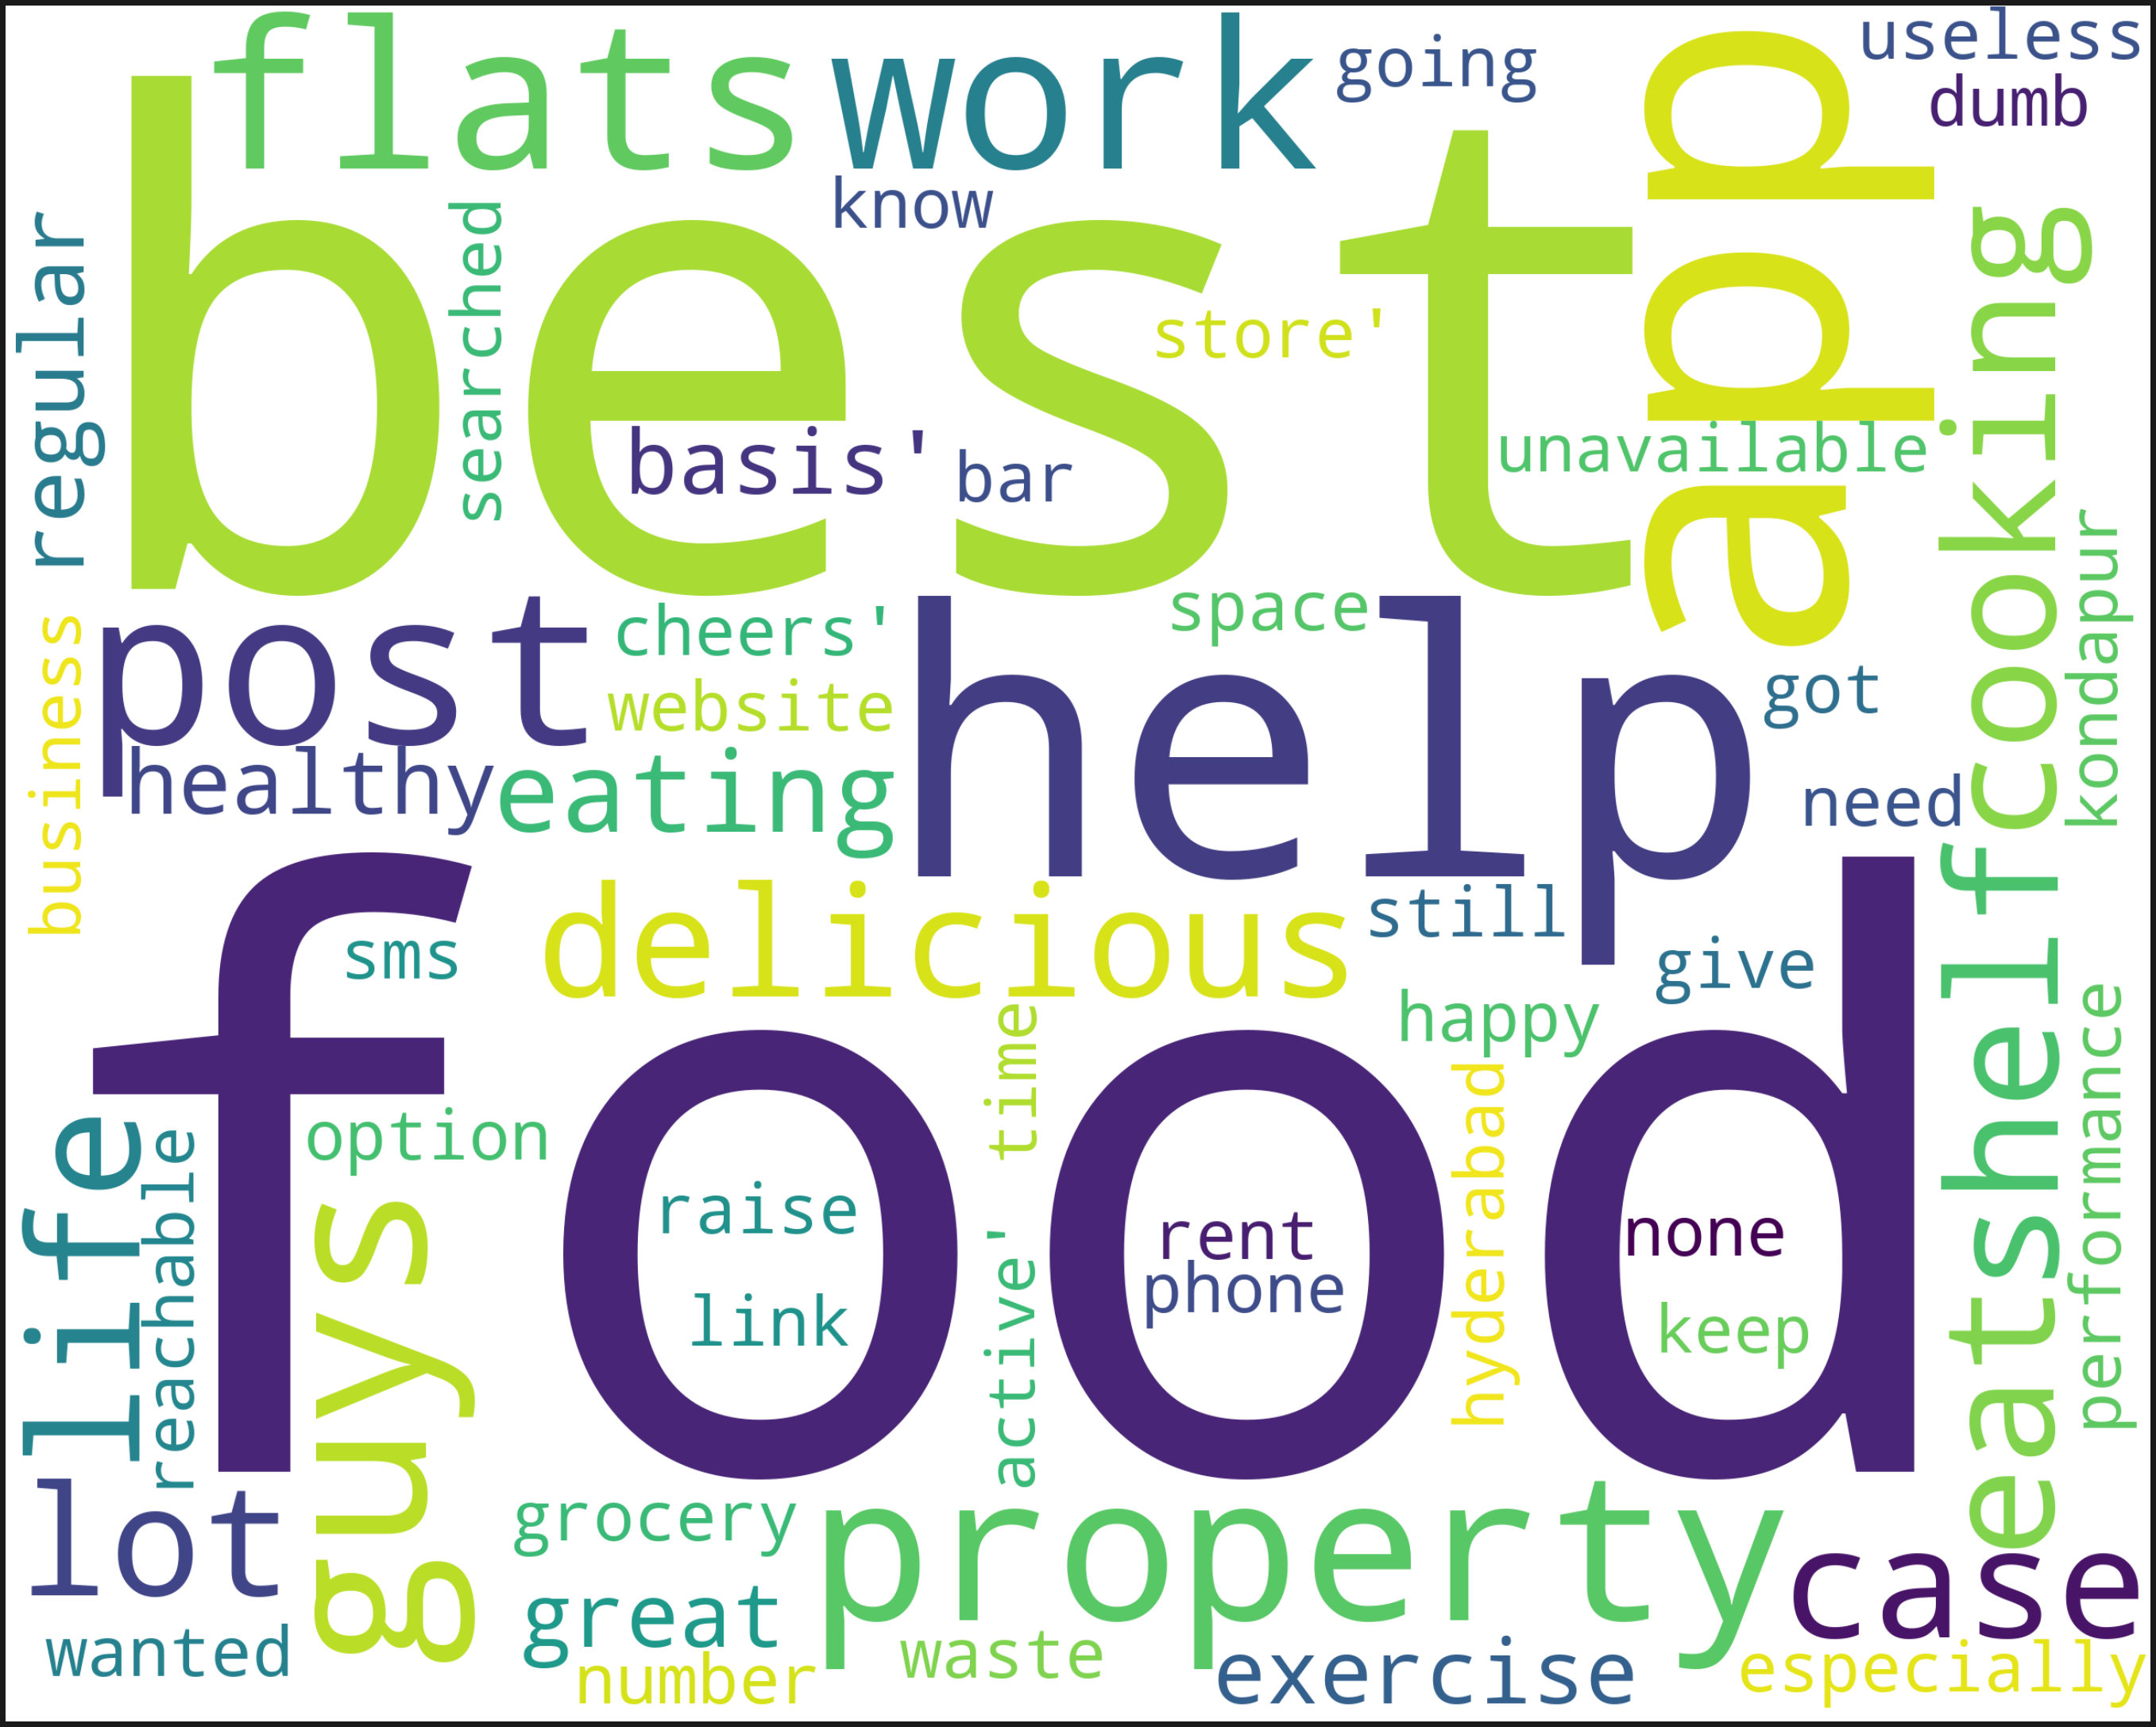

In [162]:
# plot the word cloud to get insights from textual data
from wordcloud import WordCloud, STOPWORDS

text = review_notnull.Translated_Review.values
wordcloud = WordCloud(width = 2500, height = 2000, background_color = 'white',
                      stopwords = STOPWORDS).generate(str(text).lower())

fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

* Word cloud gives us the most frequently used words in user reviews. 
* Word cloud can be used to get a view of all the textual data present in the dataset.